## Data aggregation

Goal: create 1 dataset with relevant synthesis parameters and measurement outcomes for everything I've made

Columns in output: UUID, volume fractions of everything, fit results processed with Null if version wasn't best

In [1]:
%load_ext autoreload
%autoreload 2

In [54]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../../visualizations/phase_diagram_viz')
import utils as pd_utils

## Load synthesis files

In [3]:
synthesis_files = ['/home/bgpelkie/Code/silica-np-synthesis/OptimizationRound2/2025_01_13_RandomSample/SampleTable_RandomSobol_2025_01_13.csv',
                   '/home/bgpelkie/Code/silica-np-synthesis/OptimizationRound2/2025_01_28_80nm_round1/Sample_table_2025_01_28_80nm_Round1_apdist.csv',
                   '/home/bgpelkie/Code/silica-np-synthesis/OptimizationRound2/2025_01_28_80nm_round1/Sample_table_2025_01_28_80nmRound1_rmse.csv'] 

In [4]:
fp2name = {'/home/bgpelkie/Code/silica-np-synthesis/OptimizationRound2/2025_01_13_RandomSample/SampleTable_RandomSobol_2025_01_13.csv':'Round2Random',
           '/home/bgpelkie/Code/silica-np-synthesis/OptimizationRound2/2025_01_28_80nm_round1/Sample_table_2025_01_28_80nm_Round1_apdist.csv':'Opt1_Apdist',
           '/home/bgpelkie/Code/silica-np-synthesis/OptimizationRound2/2025_01_28_80nm_round1/Sample_table_2025_01_28_80nmRound1_rmse.csv':'Opt1_rmse'
          }


In [5]:
with open('../2025_01_13_RandomSample/constants_Round2_2025_01_13.json', 'rt') as f:
    constants = json.load(f)

## split apdist and rmse uuids

In [6]:
random_files = ['Round2Random']
apdist_files = ['Opt1_Apdist']
rmse_files = ['Opt1_rmse']

In [7]:
synth_tables = []

random_uuids = []
apdist_uuids = []
rmse_uuids = []

count = 0
for fp in synthesis_files:
    data= pd.read_csv(fp)
    name = fp2name[fp]
    data['campaign'] = [name]*len(data)
    synth_tables.append(data)
    count += len(data)
    if name in random_files:
        random_uuids.extend(list(data['uuid']))
    if name in apdist_files:
        apdist_uuids.extend(list(data['uuid']))
    if name in rmse_files:
        rmse_uuids.extend(list(data['uuid']))
        
    

synth_table = pd.concat(synth_tables, axis = 0)

In [8]:
len(random_uuids)

32

In [9]:
synth_table

,Unnamed: 0,uuid,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,well,campaign,ethanol_dilute_vol,sample_dilute_vol,dilute_well
0,0,c563cb4d-d727-437f-9a6a-fef3eccbbe50,222.617091,399.058218,590.750129,487.574561,0.485800,12.367236,0.014890,A1,Round2Random,NaN,NaN,NaN
1,1,3ef8b92f-f2eb-4134-ad6c-ae3329408457,424.578425,225.592744,374.598586,675.230244,0.254717,23.586966,0.028651,A2,Round2Random,NaN,NaN,NaN
2,2,0507cf19-673b-4d6b-922e-c21f718ad4fe,290.225034,259.039405,534.588398,616.147162,0.372633,16.123118,0.019498,A3,Round2Random,NaN,NaN,NaN
3,3,82fc5e1c-5d6e-4ecd-82c3-eb912535a0d7,87.221241,134.097491,46.585717,1432.095551,1.239920,4.845476,0.006080,A4,Round2Random,NaN,NaN,NaN
4,4,9964ab9f-5b01-4ae2-b492-a1be55ce083f,44.198312,353.311589,274.447630,1028.042468,2.446865,2.455386,0.003029,A5,Round2Random,NaN,NaN,NaN
5,5,d263a9a8-70c2-49a4-badb-03a72fa16632,362.014946,39.599052,668.974648,629.411354,0.298737,20.111324,0.024235,A6,Round2Random,NaN,NaN,NaN
6,6,586ae478-4dab-4d7d-9382-ab359a49387a,467.857264,437.608025,146.758782,647.775928,0.231155,25.991272,0.031714,A7,Round2Random,NaN,NaN,NaN
7,7,7386215f-7150-48a6-b35f-96cbe5b743cf,150.571271,186.816687,456.385989,906.226053,0.718247,8.364814,0.010229,A8,Round2Random,NaN,NaN,NaN
8,8,d408858a-bbae-4227-8e64-6c368a1f3398,171.120992,296.220804,158.477050,1074.181154,0.631993,9.506430,0.011766,B1,Round2Random,NaN,NaN,NaN
9,9,0c042bd5-e5ed-4460-9bb9-d8556dba293c,429.271862,97.506840,378.830708,794.390591,0.251932,23.847704,0.029060,B3,Round2Random,NaN,NaN,NaN


In [10]:
synth_table = synth_table.drop(['Unnamed: 0'], axis = 1)


In [11]:
synth_table = synth_table.set_index('uuid')

In [12]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,well,campaign,ethanol_dilute_vol,sample_dilute_vol,dilute_well
uuid,,,,,,,,,,,,
c563cb4d-d727-437f-9a6a-fef3eccbbe50,222.617091,399.058218,590.750129,487.574561,0.485800,12.367236,0.014890,A1,Round2Random,NaN,NaN,NaN
3ef8b92f-f2eb-4134-ad6c-ae3329408457,424.578425,225.592744,374.598586,675.230244,0.254717,23.586966,0.028651,A2,Round2Random,NaN,NaN,NaN
0507cf19-673b-4d6b-922e-c21f718ad4fe,290.225034,259.039405,534.588398,616.147162,0.372633,16.123118,0.019498,A3,Round2Random,NaN,NaN,NaN
82fc5e1c-5d6e-4ecd-82c3-eb912535a0d7,87.221241,134.097491,46.585717,1432.095551,1.239920,4.845476,0.006080,A4,Round2Random,NaN,NaN,NaN
9964ab9f-5b01-4ae2-b492-a1be55ce083f,44.198312,353.311589,274.447630,1028.042468,2.446865,2.455386,0.003029,A5,Round2Random,NaN,NaN,NaN
d263a9a8-70c2-49a4-badb-03a72fa16632,362.014946,39.599052,668.974648,629.411354,0.298737,20.111324,0.024235,A6,Round2Random,NaN,NaN,NaN
586ae478-4dab-4d7d-9382-ab359a49387a,467.857264,437.608025,146.758782,647.775928,0.231155,25.991272,0.031714,A7,Round2Random,NaN,NaN,NaN
7386215f-7150-48a6-b35f-96cbe5b743cf,150.571271,186.816687,456.385989,906.226053,0.718247,8.364814,0.010229,A8,Round2Random,NaN,NaN,NaN
d408858a-bbae-4227-8e64-6c368a1f3398,171.120992,296.220804,158.477050,1074.181154,0.631993,9.506430,0.011766,B1,Round2Random,NaN,NaN,NaN


## Get volume fractions

In [13]:
def target_vol(row):
    target_vol = row['teos_volume'] + row['ammonia_volume'] + row['water_volume'] + row['ethanol_volume']
    return target_vol
    

In [14]:
synth_table['target_volume'] = synth_table.apply(target_vol, axis=1)

In [15]:
constants['TEOS']['dilution_ratio']

2.85

In [16]:
# Divide by dilution ratio to get component volume fraction from volume of dilute solution added
synth_table['teos_vol_frac'] = synth_table['teos_volume']/synth_table['target_volume']/constants['TEOS']['dilution_ratio']
synth_table['ammonia_vol_frac'] = synth_table['ammonia_volume']/synth_table['target_volume']/constants['ammonia']['dilution_ratio']
synth_table['water_vol_frac'] = synth_table['water_volume']/synth_table['target_volume']/constants['water']['dilution_ratio']
synth_table['ethanol_vol_frac'] = synth_table['ethanol_volume']/synth_table['target_volume']

In [17]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,well,campaign,ethanol_dilute_vol,sample_dilute_vol,dilute_well,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac
uuid,,,,,,,,,,,,,,,,,
c563cb4d-d727-437f-9a6a-fef3eccbbe50,222.617091,399.058218,590.750129,487.574561,0.485800,12.367236,0.014890,A1,Round2Random,NaN,NaN,NaN,1700.0,0.045948,0.082365,0.121930,0.286809
3ef8b92f-f2eb-4134-ad6c-ae3329408457,424.578425,225.592744,374.598586,675.230244,0.254717,23.586966,0.028651,A2,Round2Random,NaN,NaN,NaN,1700.0,0.087632,0.046562,0.077317,0.397194
0507cf19-673b-4d6b-922e-c21f718ad4fe,290.225034,259.039405,534.588398,616.147162,0.372633,16.123118,0.019498,A3,Round2Random,NaN,NaN,NaN,1700.0,0.059902,0.053465,0.110338,0.362440
82fc5e1c-5d6e-4ecd-82c3-eb912535a0d7,87.221241,134.097491,46.585717,1432.095551,1.239920,4.845476,0.006080,A4,Round2Random,NaN,NaN,NaN,1700.0,0.018002,0.027678,0.009615,0.842409
9964ab9f-5b01-4ae2-b492-a1be55ce083f,44.198312,353.311589,274.447630,1028.042468,2.446865,2.455386,0.003029,A5,Round2Random,NaN,NaN,NaN,1700.0,0.009122,0.072923,0.056646,0.604731
d263a9a8-70c2-49a4-badb-03a72fa16632,362.014946,39.599052,668.974648,629.411354,0.298737,20.111324,0.024235,A6,Round2Random,NaN,NaN,NaN,1700.0,0.074719,0.008173,0.138075,0.370242
586ae478-4dab-4d7d-9382-ab359a49387a,467.857264,437.608025,146.758782,647.775928,0.231155,25.991272,0.031714,A7,Round2Random,NaN,NaN,NaN,1700.0,0.096565,0.090322,0.030291,0.381045
7386215f-7150-48a6-b35f-96cbe5b743cf,150.571271,186.816687,456.385989,906.226053,0.718247,8.364814,0.010229,A8,Round2Random,NaN,NaN,NaN,1700.0,0.031078,0.038559,0.094197,0.533074
d408858a-bbae-4227-8e64-6c368a1f3398,171.120992,296.220804,158.477050,1074.181154,0.631993,9.506430,0.011766,B1,Round2Random,NaN,NaN,NaN,1700.0,0.035319,0.061139,0.032709,0.631871


In [18]:
#synth_table.to_csv('synth_table_master_11_11_24.csv')

## Load distance file

In [19]:
distance_results = pd.read_csv('distance_results_Round2_80nmOpt1_80nm.csv')

In [20]:
distance_results = distance_results.set_index('uuid')

In [21]:
distance_results

,Unnamed: 0,amplitude_distance,phase_distance,sum_ap_distance,raw_rmse_distance,sphere_diameter_nm,sphere_pdi,processes_status
uuid,,,,,,,,
c563cb4d-d727-437f-9a6a-fef3eccbbe50,0,0.994091,0.528099,1.522190,0.255116,75.943310,1.000000,success
3ef8b92f-f2eb-4134-ad6c-ae3329408457,1,1.033666,0.514583,1.548249,0.264217,101.152856,0.730457,success
0507cf19-673b-4d6b-922e-c21f718ad4fe,2,0.930899,0.558692,1.489590,0.254219,74.915296,1.000000,success
82fc5e1c-5d6e-4ecd-82c3-eb912535a0d7,3,0.734126,0.257073,0.991199,0.298204,63.510045,0.136633,success
9964ab9f-5b01-4ae2-b492-a1be55ce083f,4,0.889431,0.539605,1.429035,0.302280,177.793802,0.150685,success
d263a9a8-70c2-49a4-badb-03a72fa16632,5,1.006234,0.500148,1.506382,0.314632,134.978874,0.162232,success
586ae478-4dab-4d7d-9382-ab359a49387a,6,NaN,NaN,NaN,NaN,NaN,NaN,failed
7386215f-7150-48a6-b35f-96cbe5b743cf,7,1.025885,0.511102,1.536987,0.259520,84.355629,1.000000,success
d408858a-bbae-4227-8e64-6c368a1f3398,8,0.969823,0.564145,1.533968,0.256223,74.557883,1.000000,success


In [22]:
distance_list = []
rmse_list = []
experiment_status = []

for uuid_val in synth_table.index:
    print(uuid_val)
    try:
        row = distance_results.loc[uuid_val]
    except KeyError:
        distance_list.append(None)
        rmse_list.append(None)
        experiment_status.append('incomplete')
        continue

    if row['processes_status'] == 'failed':
        distance_list.append(distance_results['sum_ap_distance'].max())
        rmse_list.append(distance_results['raw_rmse_distance'].max())
        experiment_status.append('complete')
    if row['processes_status'] == 'success':
        distance_list.append(row['sum_ap_distance'])
        rmse_list.append(row['raw_rmse_distance'])
        experiment_status.append('complete')
        


c563cb4d-d727-437f-9a6a-fef3eccbbe50
3ef8b92f-f2eb-4134-ad6c-ae3329408457
0507cf19-673b-4d6b-922e-c21f718ad4fe
82fc5e1c-5d6e-4ecd-82c3-eb912535a0d7
9964ab9f-5b01-4ae2-b492-a1be55ce083f
d263a9a8-70c2-49a4-badb-03a72fa16632
586ae478-4dab-4d7d-9382-ab359a49387a
7386215f-7150-48a6-b35f-96cbe5b743cf
d408858a-bbae-4227-8e64-6c368a1f3398
0c042bd5-e5ed-4460-9bb9-d8556dba293c
8fbd8649-0d61-4edc-9fe3-1ca354becc5a
d4ebf798-d856-406f-9732-f11da412170b
e44ddf37-b7d0-420b-bf6c-02535ca6803a
238ebc43-fbc1-4049-b506-1dc041dedb42
8aacf82b-9869-48dd-ad8a-85eaca6ce824
a635324c-8eea-4566-af05-e39d8101ef91
08f1d123-975c-4dca-b962-6134f27e4ddc
d91aa15e-1296-4485-94d0-0cf924b116de
1537344f-106d-4cb9-b1de-3262334f8665
7c2bc3ea-ff76-42ba-88f9-86fb14a0f437
1ec7142f-1f4f-44ee-965b-da3a052e0b2a
13735048-3ac7-447e-8bca-7af4fda689cb
f041b533-6c1d-4be3-aa7b-01521b804bf8
1c5c16fb-5f52-451d-a370-36a6418ab246
0a4b4bec-376d-4106-853e-53c50b36e515
ee885bbe-4e05-426d-9772-0e1e3293e727
da675871-7139-4a31-8e76-317fb87385fa
9

In [23]:
synth_table['ap_distance'] = distance_list
synth_table['rmse_distance'] = rmse_list
synth_table['experiment_status'] = experiment_status

In [24]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,well,campaign,ethanol_dilute_vol,sample_dilute_vol,dilute_well,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,rmse_distance,experiment_status
uuid,,,,,,,,,,,,,,,,,,,,
c563cb4d-d727-437f-9a6a-fef3eccbbe50,222.617091,399.058218,590.750129,487.574561,0.485800,12.367236,0.014890,A1,Round2Random,NaN,NaN,NaN,1700.0,0.045948,0.082365,0.121930,0.286809,1.522190,0.255116,complete
3ef8b92f-f2eb-4134-ad6c-ae3329408457,424.578425,225.592744,374.598586,675.230244,0.254717,23.586966,0.028651,A2,Round2Random,NaN,NaN,NaN,1700.0,0.087632,0.046562,0.077317,0.397194,1.548249,0.264217,complete
0507cf19-673b-4d6b-922e-c21f718ad4fe,290.225034,259.039405,534.588398,616.147162,0.372633,16.123118,0.019498,A3,Round2Random,NaN,NaN,NaN,1700.0,0.059902,0.053465,0.110338,0.362440,1.489590,0.254219,complete
82fc5e1c-5d6e-4ecd-82c3-eb912535a0d7,87.221241,134.097491,46.585717,1432.095551,1.239920,4.845476,0.006080,A4,Round2Random,NaN,NaN,NaN,1700.0,0.018002,0.027678,0.009615,0.842409,0.991199,0.298204,complete
9964ab9f-5b01-4ae2-b492-a1be55ce083f,44.198312,353.311589,274.447630,1028.042468,2.446865,2.455386,0.003029,A5,Round2Random,NaN,NaN,NaN,1700.0,0.009122,0.072923,0.056646,0.604731,1.429035,0.302280,complete
d263a9a8-70c2-49a4-badb-03a72fa16632,362.014946,39.599052,668.974648,629.411354,0.298737,20.111324,0.024235,A6,Round2Random,NaN,NaN,NaN,1700.0,0.074719,0.008173,0.138075,0.370242,1.506382,0.314632,complete
586ae478-4dab-4d7d-9382-ab359a49387a,467.857264,437.608025,146.758782,647.775928,0.231155,25.991272,0.031714,A7,Round2Random,NaN,NaN,NaN,1700.0,0.096565,0.090322,0.030291,0.381045,2.237381,1.856282,complete
7386215f-7150-48a6-b35f-96cbe5b743cf,150.571271,186.816687,456.385989,906.226053,0.718247,8.364814,0.010229,A8,Round2Random,NaN,NaN,NaN,1700.0,0.031078,0.038559,0.094197,0.533074,1.536987,0.259520,complete
d408858a-bbae-4227-8e64-6c368a1f3398,171.120992,296.220804,158.477050,1074.181154,0.631993,9.506430,0.011766,B1,Round2Random,NaN,NaN,NaN,1700.0,0.035319,0.061139,0.032709,0.631871,1.533968,0.256223,complete


## Split out RMSE and APDist results

In [25]:
apdist_samples = random_uuids.copy()
apdist_samples.extend(apdist_uuids)

rmse_samples = random_uuids.copy()
rmse_samples.extend(rmse_uuids)

In [26]:
len(rmse_samples)

42

In [27]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,well,campaign,ethanol_dilute_vol,sample_dilute_vol,dilute_well,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,rmse_distance,experiment_status
uuid,,,,,,,,,,,,,,,,,,,,
c563cb4d-d727-437f-9a6a-fef3eccbbe50,222.617091,399.058218,590.750129,487.574561,0.485800,12.367236,0.014890,A1,Round2Random,NaN,NaN,NaN,1700.0,0.045948,0.082365,0.121930,0.286809,1.522190,0.255116,complete
3ef8b92f-f2eb-4134-ad6c-ae3329408457,424.578425,225.592744,374.598586,675.230244,0.254717,23.586966,0.028651,A2,Round2Random,NaN,NaN,NaN,1700.0,0.087632,0.046562,0.077317,0.397194,1.548249,0.264217,complete
0507cf19-673b-4d6b-922e-c21f718ad4fe,290.225034,259.039405,534.588398,616.147162,0.372633,16.123118,0.019498,A3,Round2Random,NaN,NaN,NaN,1700.0,0.059902,0.053465,0.110338,0.362440,1.489590,0.254219,complete
82fc5e1c-5d6e-4ecd-82c3-eb912535a0d7,87.221241,134.097491,46.585717,1432.095551,1.239920,4.845476,0.006080,A4,Round2Random,NaN,NaN,NaN,1700.0,0.018002,0.027678,0.009615,0.842409,0.991199,0.298204,complete
9964ab9f-5b01-4ae2-b492-a1be55ce083f,44.198312,353.311589,274.447630,1028.042468,2.446865,2.455386,0.003029,A5,Round2Random,NaN,NaN,NaN,1700.0,0.009122,0.072923,0.056646,0.604731,1.429035,0.302280,complete
d263a9a8-70c2-49a4-badb-03a72fa16632,362.014946,39.599052,668.974648,629.411354,0.298737,20.111324,0.024235,A6,Round2Random,NaN,NaN,NaN,1700.0,0.074719,0.008173,0.138075,0.370242,1.506382,0.314632,complete
586ae478-4dab-4d7d-9382-ab359a49387a,467.857264,437.608025,146.758782,647.775928,0.231155,25.991272,0.031714,A7,Round2Random,NaN,NaN,NaN,1700.0,0.096565,0.090322,0.030291,0.381045,2.237381,1.856282,complete
7386215f-7150-48a6-b35f-96cbe5b743cf,150.571271,186.816687,456.385989,906.226053,0.718247,8.364814,0.010229,A8,Round2Random,NaN,NaN,NaN,1700.0,0.031078,0.038559,0.094197,0.533074,1.536987,0.259520,complete
d408858a-bbae-4227-8e64-6c368a1f3398,171.120992,296.220804,158.477050,1074.181154,0.631993,9.506430,0.011766,B1,Round2Random,NaN,NaN,NaN,1700.0,0.035319,0.061139,0.032709,0.631871,1.533968,0.256223,complete


In [28]:
rmse_samples

['c563cb4d-d727-437f-9a6a-fef3eccbbe50',
 '3ef8b92f-f2eb-4134-ad6c-ae3329408457',
 '0507cf19-673b-4d6b-922e-c21f718ad4fe',
 '82fc5e1c-5d6e-4ecd-82c3-eb912535a0d7',
 '9964ab9f-5b01-4ae2-b492-a1be55ce083f',
 'd263a9a8-70c2-49a4-badb-03a72fa16632',
 '586ae478-4dab-4d7d-9382-ab359a49387a',
 '7386215f-7150-48a6-b35f-96cbe5b743cf',
 'd408858a-bbae-4227-8e64-6c368a1f3398',
 '0c042bd5-e5ed-4460-9bb9-d8556dba293c',
 '8fbd8649-0d61-4edc-9fe3-1ca354becc5a',
 'd4ebf798-d856-406f-9732-f11da412170b',
 'e44ddf37-b7d0-420b-bf6c-02535ca6803a',
 '238ebc43-fbc1-4049-b506-1dc041dedb42',
 '8aacf82b-9869-48dd-ad8a-85eaca6ce824',
 'a635324c-8eea-4566-af05-e39d8101ef91',
 '08f1d123-975c-4dca-b962-6134f27e4ddc',
 'd91aa15e-1296-4485-94d0-0cf924b116de',
 '1537344f-106d-4cb9-b1de-3262334f8665',
 '7c2bc3ea-ff76-42ba-88f9-86fb14a0f437',
 '1ec7142f-1f4f-44ee-965b-da3a052e0b2a',
 '13735048-3ac7-447e-8bca-7af4fda689cb',
 'f041b533-6c1d-4be3-aa7b-01521b804bf8',
 '1c5c16fb-5f52-451d-a370-36a6418ab246',
 '0a4b4bec-376d-

In [30]:
synth_table_apdist = synth_table.loc[apdist_samples]
synth_table_rmse = synth_table.loc[rmse_samples]

In [31]:
synth_table_apdist = synth_table_apdist[synth_table_apdist['experiment_status'] == 'complete'].copy()
synth_table_rmse = synth_table_rmse[synth_table_rmse['experiment_status'] == 'complete'].copy()

In [32]:
synth_table_apdist['rank'] = synth_table_apdist['ap_distance'].rank()
synth_table_rmse['rank'] = synth_table_rmse['ap_distance'].rank()

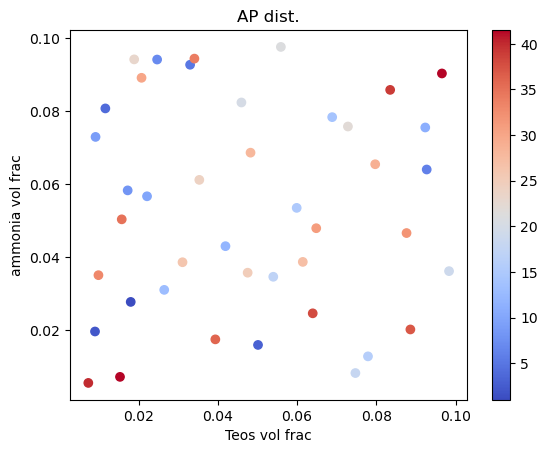

In [33]:
fig, ax = plt.subplots()

sc = ax.scatter(synth_table_apdist['teos_vol_frac'], synth_table_apdist['ammonia_vol_frac'], c = synth_table_apdist['rank'], cmap = plt.cm.coolwarm)
ax.set_xlabel('Teos vol frac')
ax.set_ylabel('ammonia vol frac')
ax.set_title('AP dist.')
cbar = fig.colorbar(sc, ax = ax)

In [34]:
synth_table['teos_vol_frac'].max()

0.1000000014901161

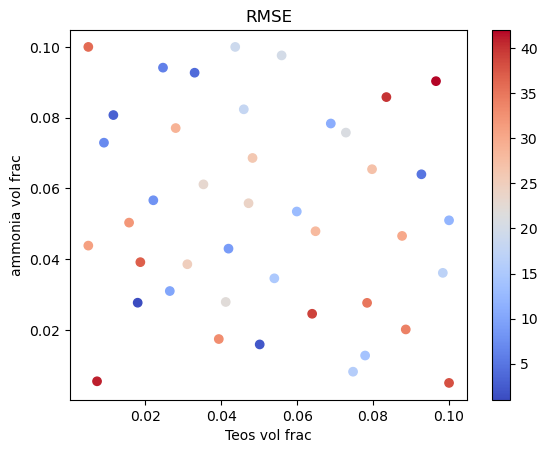

In [35]:
fig, ax = plt.subplots()

sc = ax.scatter(synth_table_rmse['teos_vol_frac'], synth_table_rmse['ammonia_vol_frac'], c = synth_table_rmse['rank'], cmap = plt.cm.coolwarm)
ax.set_xlabel('Teos vol frac')
ax.set_ylabel('ammonia vol frac')
ax.set_title('RMSE')
cbar = fig.colorbar(sc, ax = ax)

In [36]:

name_bounds_apdist = {}
for name in fp2name.values():
    name_bounds_apdist[name] = []
    count = 0
    for i, row in synth_table_apdist.iterrows():
        bounds = []
        if row['campaign'] == name:
            name_bounds_apdist[name].append(count)
        count += 1
        

In [37]:
best_distances_ap = []
for i, row in synth_table_apdist.iterrows():
    dist = row['ap_distance']
    if len(best_distances_ap) == 0:
        best_distances_ap.append(dist)
    else:
        best_distances_ap.append(min(best_distances_ap[-1], dist))

/home/bgpelkie/miniconda3/envs/sas/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/bgpelkie/miniconda3/envs/sas/lib/python3.12/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


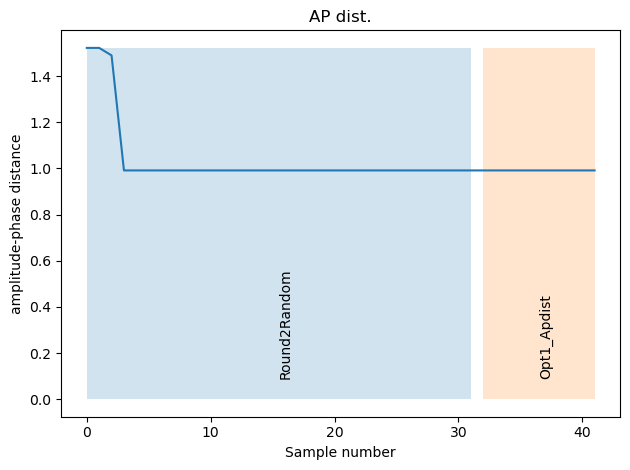

In [38]:
fig, ax = plt.subplots()

for name, bounds in name_bounds_apdist.items():
    ax.fill_between(bounds, 0, max(best_distances_ap), alpha = 0.2)
    ax.text(np.mean(bounds), 0.1, name, rotation = 'vertical')
ax.plot(best_distances_ap)


ax.set_xlabel('Sample number')
ax.set_ylabel('amplitude-phase distance')
ax.set_title('AP dist.')

plt.tight_layout()
#plt.savefig('Campaign_convergence_plot.png', dpi = 300)

In [39]:
# rmse
name_bounds_rmse = {}
for name in fp2name.values():
    name_bounds_rmse[name] = []
    count = 0
    for i, row in synth_table_rmse.iterrows():
        bounds = []
        if row['campaign'] == name:
            name_bounds_rmse[name].append(count)
        count += 1

In [40]:
best_distances_rmse = []
for i, row in synth_table_rmse.iterrows():
    dist = row['ap_distance']
    if len(best_distances_rmse) == 0:
        best_distances_rmse.append(dist)
    else:
        best_distances_rmse.append(min(best_distances_rmse[-1], dist))

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


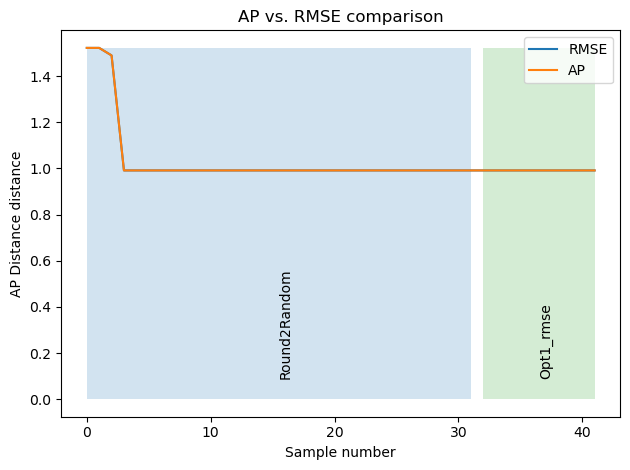

In [41]:
fig, ax = plt.subplots()

for name, bounds in name_bounds_rmse.items():
    ax.fill_between(bounds, 0, max(best_distances_rmse), alpha = 0.2)
    ax.text(np.mean(bounds), 0.1, name, rotation = 'vertical')
ax.plot(best_distances_rmse, label = 'RMSE')
ax.plot(best_distances_ap, label = 'AP')

ax.legend(loc = 'upper right')


ax.set_xlabel('Sample number')
ax.set_ylabel('AP Distance distance')
ax.set_title('AP vs. RMSE comparison')

plt.tight_layout()
#plt.savefig('Campaign_convergence_plot.png', dpi = 300)

In [42]:
synth_table_rmse[synth_table_rmse['rmse_distance'] == synth_table_rmse['rmse_distance'].min()]

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,well,campaign,ethanol_dilute_vol,...,dilute_well,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,rmse_distance,experiment_status,rank
uuid,,,,,,,,,,,,,,,,,,,,,
d91aa15e-1296-4485-94d0-0cf924b116de,377.418571,61.77062,187.661303,1073.149507,0.286545,20.967054,0.025885,C4,Round2Random,NaN,...,NaN,1700.0,0.077899,0.012749,0.038733,0.631264,1.491098,0.227101,complete,14.0


In [43]:
synth_table_rmse

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,well,campaign,ethanol_dilute_vol,...,dilute_well,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,rmse_distance,experiment_status,rank
uuid,,,,,,,,,,,,,,,,,,,,,
c563cb4d-d727-437f-9a6a-fef3eccbbe50,222.617091,399.058218,590.750129,487.574561,0.485800,12.367236,0.014890,A1,Round2Random,NaN,...,NaN,1700.0,0.045948,0.082365,0.121930,0.286809,1.522190,0.255116,complete,18.0
3ef8b92f-f2eb-4134-ad6c-ae3329408457,424.578425,225.592744,374.598586,675.230244,0.254717,23.586966,0.028651,A2,Round2Random,NaN,...,NaN,1700.0,0.087632,0.046562,0.077317,0.397194,1.548249,0.264217,complete,30.0
0507cf19-673b-4d6b-922e-c21f718ad4fe,290.225034,259.039405,534.588398,616.147162,0.372633,16.123118,0.019498,A3,Round2Random,NaN,...,NaN,1700.0,0.059902,0.053465,0.110338,0.362440,1.489590,0.254219,complete,13.0
82fc5e1c-5d6e-4ecd-82c3-eb912535a0d7,87.221241,134.097491,46.585717,1432.095551,1.239920,4.845476,0.006080,A4,Round2Random,NaN,...,NaN,1700.0,0.018002,0.027678,0.009615,0.842409,0.991199,0.298204,complete,1.0
9964ab9f-5b01-4ae2-b492-a1be55ce083f,44.198312,353.311589,274.447630,1028.042468,2.446865,2.455386,0.003029,A5,Round2Random,NaN,...,NaN,1700.0,0.009122,0.072923,0.056646,0.604731,1.429035,0.302280,complete,7.0
d263a9a8-70c2-49a4-badb-03a72fa16632,362.014946,39.599052,668.974648,629.411354,0.298737,20.111324,0.024235,A6,Round2Random,NaN,...,NaN,1700.0,0.074719,0.008173,0.138075,0.370242,1.506382,0.314632,complete,16.0
586ae478-4dab-4d7d-9382-ab359a49387a,467.857264,437.608025,146.758782,647.775928,0.231155,25.991272,0.031714,A7,Round2Random,NaN,...,NaN,1700.0,0.096565,0.090322,0.030291,0.381045,2.237381,1.856282,complete,42.0
7386215f-7150-48a6-b35f-96cbe5b743cf,150.571271,186.816687,456.385989,906.226053,0.718247,8.364814,0.010229,A8,Round2Random,NaN,...,NaN,1700.0,0.031078,0.038559,0.094197,0.533074,1.536987,0.259520,complete,25.0
d408858a-bbae-4227-8e64-6c368a1f3398,171.120992,296.220804,158.477050,1074.181154,0.631993,9.506430,0.011766,B1,Round2Random,NaN,...,NaN,1700.0,0.035319,0.061139,0.032709,0.631871,1.533968,0.256223,complete,23.0


In [44]:
## best for campaign plot

name_distances_apdist = {}
for name in fp2name.values():
    count = 0
    for i, row in synth_table_apdist.iterrows():
        bounds = []
        if row['campaign'] == name:
            try:
               name_distances_apdist[name].append(row['ap_distance'])
            except KeyError:
                name_distances_apdist[name] = [row['ap_distance']]
        count += 1

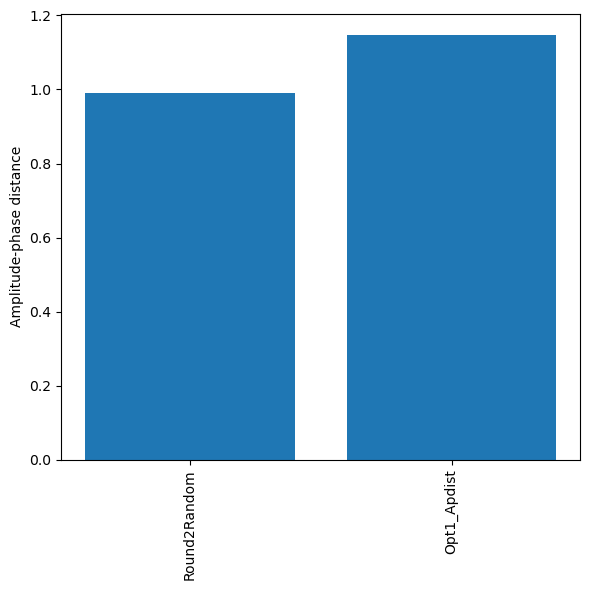

In [45]:
fig, ax = plt.subplots(figsize = (6,6))
name_distances_max = [min(distances) for distances in name_distances_apdist.values()]
ax.bar(name_distances_apdist.keys(), name_distances_max)
ax.tick_params(axis = 'x', rotation = 90)
ax.set_ylabel('Amplitude-phase distance')

plt.tight_layout()

plt.savefig('best_per_campaign.png', dpi = 300)

In [46]:
synth_table_apdist.to_csv('synth_table_Round2_opt1_80nm.csv')
#synth_table_rmse.to_csv('synth_table_12_18_24_rmse.csv')

## Phase diagram plot

In [47]:
with open('scaled_intensities_OpotRound1_Random.json', 'r') as f:
    intensities = json.load(f)

with open('../2025_01_28_80nm_round1/constants_Round2_2025_01_28.json', 'r') as f:
    constants = json.load(f)

In [48]:
sample_table = pd.read_csv('synth_table_Round2_opt1_80nm.csv')

In [49]:
x_name = 'TEOS'
y_name = 'water'
y_2_name = 'ammonia'

x_min = constants[x_name]['minimum_volume_fraction']
x_max = constants[x_name]['maximum_volume_fraction']
y_min = constants[y_name]['minimum_volume_fraction']
y_max = constants[y_name]['maximum_volume_fraction']

y_2_min = constants[y_2_name]['minimum_volume_fraction']
y_2_max = constants[y_2_name]['maximum_volume_fraction']

bounds = np.array([[x_min, y_min], [x_max, y_max]])
bounds_2 = np.array([[x_min, y_2_min], [x_max, y_2_max]])

### APdist

I scaled None
<function plot_phasemap.<locals>.<lambda> at 0x7f2fe7df6ca0>
<function plot_phasemap.<locals>.<lambda> at 0x7f2fe8e751c0>


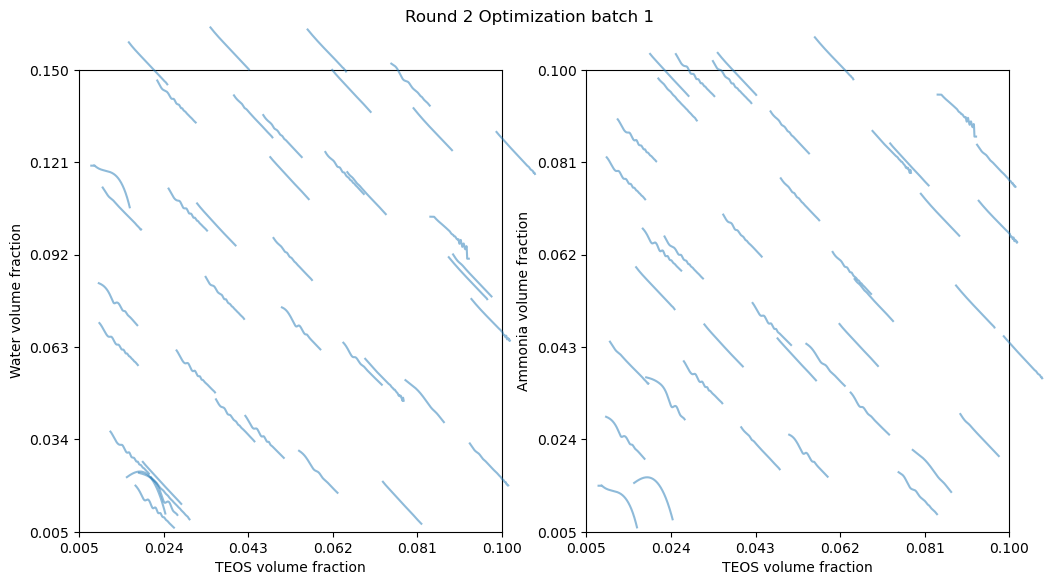

In [72]:
x_key = 'teos_vol_frac'
y_key = 'water_vol_frac'
y_2_key = 'ammonia_vol_frac'

fig, ax = plt.subplots(1,2, figsize = (12,6))

c_1 = []
s = []
c_2 = []
for uuid_val in apdist_samples:
    row = synth_table.loc[uuid_val]


    x_val = row[x_key]
    y_val = row[y_key]
    y_2_val = row[y_2_key]
    
    intensity = intensities[uuid_val]
    

    q = intensity['q_grid']
    I = intensity['I_scaled']

    if I == None:
        print('I scaled None')
        continue

    else:
        c_1.append([x_val, y_val])
        s.append(I)
        c_2.append([x_val, y_2_val])

s = np.array(s)

pd_utils.plot_phasemap(bounds, ax[0], c_1, s, scale_axis=True)
pd_utils.plot_phasemap(bounds_2, ax[1], c_2, s)


ax[0].set_xlabel('TEOS volume fraction')
ax[0].set_ylabel('Water volume fraction')
ax[1].set_xlabel('TEOS volume fraction')
ax[1].set_ylabel('Ammonia volume fraction')


fig.suptitle('Round 2 Optimization batch 1')
plt.savefig('Phaseplot_Round2Random.png', dpi = 300)

## RMSE

I scaled None
<function plot_phasemap.<locals>.<lambda> at 0x7f2fe840fce0>
<function plot_phasemap.<locals>.<lambda> at 0x7f2fe9b07c40>


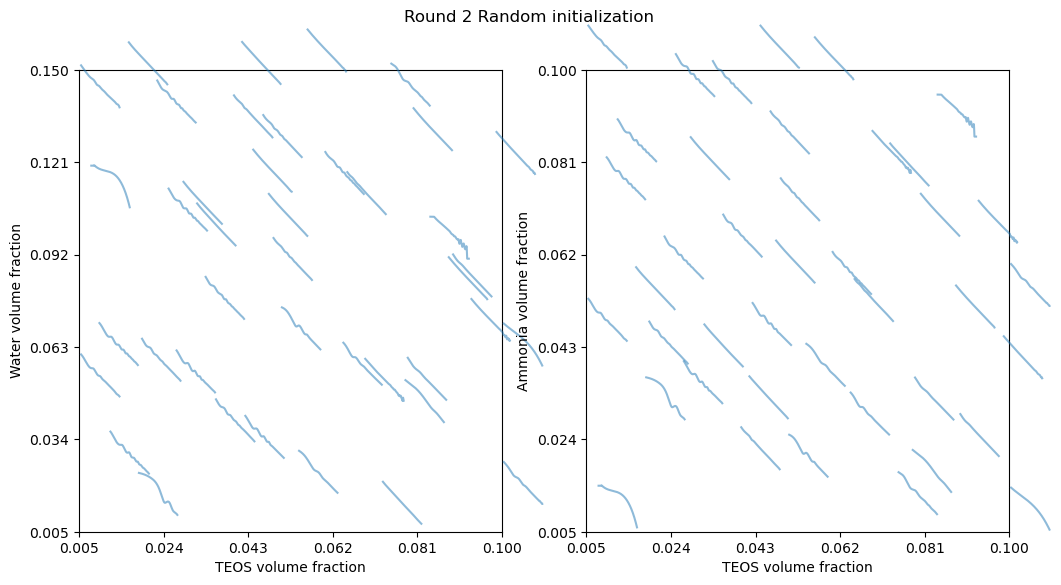

In [74]:
x_key = 'teos_vol_frac'
y_key = 'water_vol_frac'
y_2_key = 'ammonia_vol_frac'

fig, ax = plt.subplots(1,2, figsize = (12,6))

c_1 = []
s = []
c_2 = []
for uuid_val in rmse_samples:
    row = synth_table.loc[uuid_val]


    x_val = row[x_key]
    y_val = row[y_key]
    y_2_val = row[y_2_key]
    
    intensity = intensities[uuid_val]
    

    q = intensity['q_grid']
    I = intensity['I_scaled']

    if I == None:
        print('I scaled None')
        continue

    else:
        c_1.append([x_val, y_val])
        s.append(I)
        c_2.append([x_val, y_2_val])

s = np.array(s)

pd_utils.plot_phasemap(bounds, ax[0], c_1, s, scale_axis=True)
pd_utils.plot_phasemap(bounds_2, ax[1], c_2, s)


ax[0].set_xlabel('TEOS volume fraction')
ax[0].set_ylabel('Water volume fraction')
ax[1].set_xlabel('TEOS volume fraction')
ax[1].set_ylabel('Ammonia volume fraction')


fig.suptitle('Round 2 Random initialization')
plt.savefig('Phaseplot_Round2Random.png', dpi = 300)